<a href="https://colab.research.google.com/github/QuratAkhter/EDA-Heart-Disease-Analysis/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart_disease_uci.csv')

In [3]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 1. General Information

In [4]:
dataset.shape

(920, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
dataset.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


# 2. Target Variable Analysis

In [7]:
dataset['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [8]:
print("No. of Patient Don't have Heart Disease: ",(dataset['num']==0).sum())
print("No. of Patient having Heart Disease: ",(dataset['num']!=0).sum())

No. of Patient Don't have Heart Disease:  411
No. of Patient having Heart Disease:  509


# 3. Demographic Insights

In [9]:
dataset['age'].min()

28

In [10]:
dataset['age'].max()

77

In [11]:
print("The Range of Age is: ",dataset['age'].max()-dataset['age'].min())

The Range of Age is:  49


In [12]:
dataset['sex'].value_counts()

,count
sex,
Male,726
Female,194


# 4. Health Metrics

In [13]:
dataset.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [14]:
print("Average Value of Resting Blood Pressure is: ",round(dataset['trestbps'].mean(),2))
print("Median of Resting Blood Pressure is: ",dataset['trestbps'].median())

Average Value of Resting Blood Pressure is:  132.13
Median of Resting Blood Pressure is:  130.0


In [15]:
print("Average Value of Serum Cholestrol is: ",round(dataset['chol'].mean(),2))
print("Median of Serum Cholestrol is: ",dataset['chol'].median())

Average Value of Serum Cholestrol is:  199.13
Median of Serum Cholestrol is:  223.0


In [16]:
print("Average Value of Serum Cholestrol is: ",round(dataset['thalch'].mean(),2))
print("Median of Serum Cholestrol is: ",dataset['thalch'].median())

Average Value of Serum Cholestrol is:  137.55
Median of Serum Cholestrol is:  140.0


# 5. Categorical Features

In [17]:
dataset['exang'].value_counts()

,count
exang,
False,528
True,337


In [18]:
dataset['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


# 6. Visual Analysis

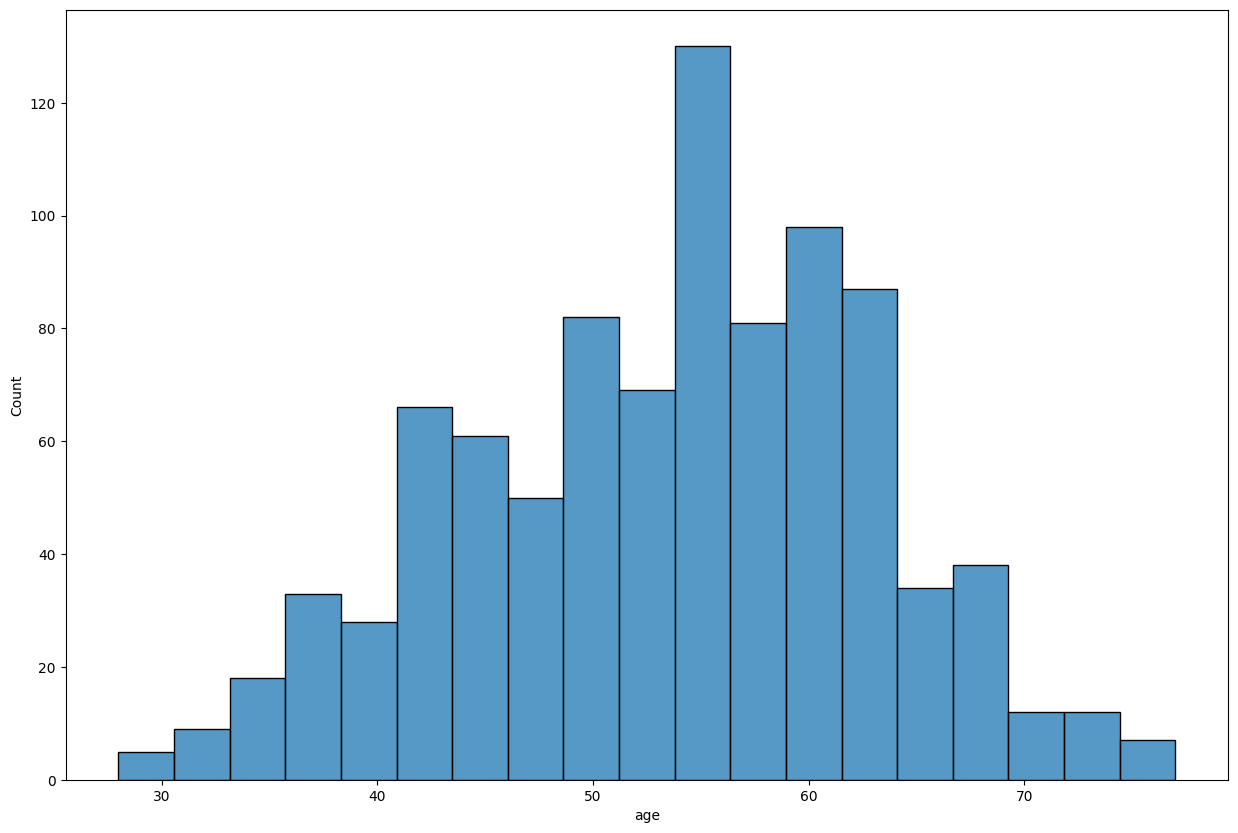

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(dataset['age'])
plt.show()

In [21]:
avg_chol_with_disease=dataset[dataset['num']==1]['chol'].mean()
avg_chol_without_disease=dataset[dataset['num']==0]['chol'].mean()

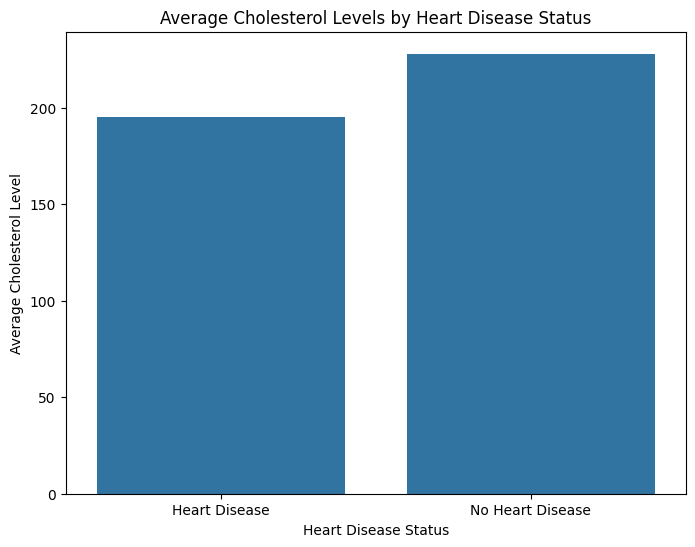

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Heart Disease', 'No Heart Disease'], y=[avg_chol_with_disease, avg_chol_without_disease])
plt.xlabel('Heart Disease Status')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Levels by Heart Disease Status')
plt.show()

# 7. Outliers

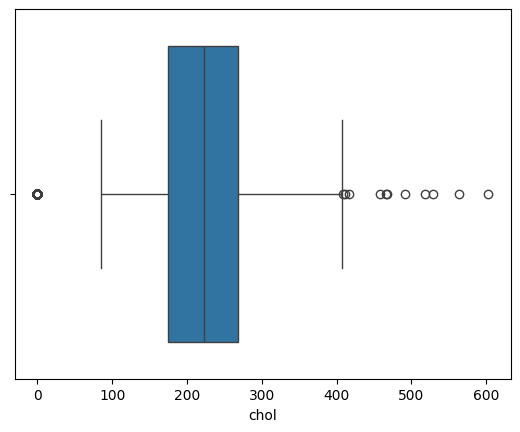

In [31]:
sns.boxplot(x='chol',data=dataset)
plt.show()

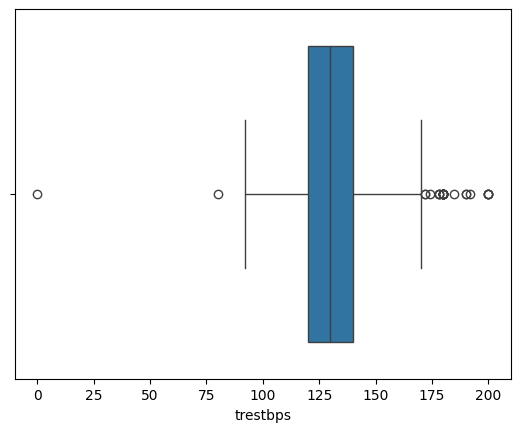

In [32]:
sns.boxplot(x='trestbps',data=dataset)
plt.show()